## Araç Sigortası Satış Tahmin Problemi
Araç sahiplerinin araç sigortası satın almak konusundaki niyetlerinin tespiti sigorta şirketleri için büyük önem taşır. Doğru tahminler sigorta şirketleri için bir iletişim stratejisi planlayarak potansiyel müşterilere ulaşma, iş modellerini ve gelirlerini optmize etme fırsatı yaratır.   

Müşterilerine sağlık sigortası sağlayan bir sigorta şirketi bir önceki yılın poliçe sahiplerine araç sigortası satmayı planlamaktadır. Müşterilerin araç sigortası ile ilgilenip ilgilenmediklerini tahmin amacıyla kullanılacak şirket verisi müşterinin demografik bilgilerini (yaş, cinsiyet, bulunduğu il vb), araç özelliklerini (yaş ve hasar durumu) ve poliçe bilgilerini (prim ve kanal bilgileri) içermektedir. 

Aşağıdaki tablo veri setinde kullanılan öznitelikleri (features) ve açıklamalarını içermektedir.

|Öznitelik|Açıklama|
|---------|--------|
|Musteri_no|Anonim müşteri no|
|Cinsiyet|Müşteri cinsiyeti (E/K)|
|Yas|Müşteri doğum yılı|
|Ehliyet|Müşteri ehliyet durumu (Var/Yok)|
|Sehir|Müşterinin bulunduğu il|
|Gecmis_police|Müşterinin halihazırda araç sigortası var mı? (Var/Yok)|
|Arac_yasi|Aracın yaşı (<1 Yıl, 1-2 Yıl, 2-5 Yıl, 5-10 Yıl, >10 Yıl)|
|Hasar_durumu|Müşteri aracında geçmişte hasar oluştu mu? (E/H)|
|Yillik_prm|Yıllık prim bedeli|
|Acenta_no|Satış sorumlusu kod numarası (anonim)|
|Sure|Sigortalı (sağlık sigortası) olma süresi (gün)|
|Sonuc|Müşteri isteği (hedef): ilgileniyor (1), ilgilenmiyor (0)|

### Veri dosyaları
**1. `Arac_train.xlsx`** (254687 gözlem, 11 öznitelik, 1 hedef) : En iyi modelinizi seçmek için kullanacağınız eğitim verisi.

**2. `Arac_test.xlsx`** (63672 gözlem, 11 öznitelik) 

### Başarı metriği
Bu hackathon için değerlendirme metriğiniz "**ROC_AUC Score**" olarak belirlenmiştir.

### Hackathon rehberi
* DA503 finali için almış olduğunuz Kaggle hesaplarını burada kullanabilirsiniz. Önemli olan Public Leaderboard üzerinde isimlerinizin görünüyor olmasıdır.
* Kaggle'a giriş yaptıktan sonra **https://www.kaggle.com/t/96ff603c76bb404589d4e4d5c0068be4** linki üzerinden yarışma sayfasını açın.
* En iyi çalışan modeli elde ettiğinizde bir tahmin dosyası hazırlayın (örneğin **`pred.csv`** gibi) ve Kaggle'a yükleyin. Kullandığınız dosya isminin bir önemi bulunmamaktadır. Ancak bir hata ile karşılaşmamak için dosya formatı kritik öneme sahiptir (bir sonraki maddeyi lütfen dikkatle inceleyin).
* Unutmayın, Hackathon süresince **7** kez çözüm dosyası yükleme hakkınız bulunmaktadır. 

### Kaggle'a yüklenecek dosyayı nasıl hazırlayacağım?

Test verisini kullanarak oluşturduğunuz tahminlerinizi bir **.csv** dosyasına (örneğin **`pred.csv`**) birer satır olarak alt alta yazarak Kaggle'a yüklemeniz gerekmektedir. Dosyanızın aşağıdaki gibi bir formatta hazırlanmış olması bir hata ile karşılaşmamanız için oldukça önemlidir. Aşağıdaki örnekte "Prediction" kolonundaki değerler rasgele seçilmiştir.

Tahminlerimizi **dfpred** isimli bir dataframe'de topladığımızı düşünelim: 

<pre>
>>> dfpred.head(63672)
</pre>
|ID|Prediction|
|-----|--------|
|1|0|
|2|1|
|...|...|
|63671|0|
|63672|1|

Dosyada "ID" ve "Prediction" bir "header" olarak bulunmalıdır. "ID" kolonu 1 ile 63672 (her ikisi de dahil)
arasında değişen bir integer olarak verilmelidir.


### Kaggle tahmin dosyanızı nasıl değerlendiriyor?

Tahminlerinizi (pred.csv) Kaggle'a 7 kez yükleme hakkınız bulunmaktadır. Çözüm için kullandığınız modellerin hiç görmediği test verisi üzerindeki **ROC_AUC** performanslarını ancak bu şekilde ölçebilirsiniz. Modelde yapılan değişikliklerin sonuçlarını Kaggle üzerindeki performansınızı takip ederek yorumlayabilirsiniz. Aynı zamanda diğer grupların performansları ve sıralamaları da buradan görünür olacaktır.

**Dikkat**: Kaggle'da **Public Leaderboard** altında görünen (ROC_AUC) skorunuz test verisinin yalnızca %40'ı üzerindeki değerlendirme ile sıralamaya alınmaktadır. Hackathon'un nihai sıralaması ancak yarışma tamamlandığında test verisinin geriye kalan %60'ının da değerlendirmeye eklenmesiye (bu kısım sizlere görünür olmayan **Private Leaderboard** altında tutuluyor) ortaya çıkacaktır. 

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.preprocessing as pre
import sklearn.linear_model as lin
import sklearn.model_selection as mod
import sklearn.metrics as met
import sklearn.pipeline as pip
import sklearn.tree as tree
import sklearn.ensemble as ens
import seaborn as sns
from sklearn import cluster as clu
import sklearn.compose as cmp
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from imblearn import over_sampling as ove
from imblearn import under_sampling as und
from imblearn import combine as com
from imblearn import pipeline as imbPipe
from lightgbm import LGBMClassifier
from scipy import stats

# Basic Analysis

In [6]:
df = pd.read_excel("Arac_train.xlsx")
df.head()

,Musteri_no,Cinsiyet,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc
0,301236,E,1985,Var,Ordu,Yok,1-2 Yil,E,2960.00,147,131,0
1,360545,E,1990,Var,Gaziantep,Var,< 1 Yil,H,3081.78,177,213,0
2,124745,E,1990,Var,Kocaeli,Yok,< 1 Yil,E,3672.67,177,72,0
3,72320,E,1995,Var,Izmir,Var,< 1 Yil,H,3599.89,177,117,0
4,226178,E,1998,Var,Kocaeli,Yok,< 1 Yil,E,3697.22,177,177,0


In [5]:
pd.concat([df.describe(include="all").T,(round(100*(df.isnull().sum()/len(df.index)), 2)).rename('missing_ratio')], axis=1)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_ratio
Musteri_no,254687,NaN,NaN,NaN,210691,110048,20001,115380,210577,306056,401109,0.0
Cinsiyet,254687,2,E,136235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Yas,254687,NaN,NaN,NaN,1981.6,15.5884,1935,1971,1985,1996,2000,0.0
Ehliyet,254687,2,Var,254160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Sehir,254687,53,Istanbul,77761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Gecmis_police,254687,2,Yok,133227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Arac_yasi,254687,5,1-2 Yil,128222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Hasar_durumu,254687,2,H,130014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Yillik_prim,254687,NaN,NaN,NaN,4009.91,1452.61,292.22,3153.44,3768,4588.22,60018.3,0.0
Acenta_no,254687,NaN,NaN,NaN,136.737,53.8973,26,54,149,177,188,0.0


In [6]:
#No need for missing imputation

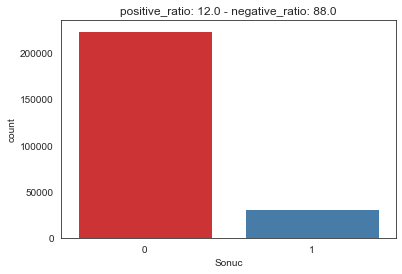

In [8]:
positive_ratio    = (str(round(df[df["Sonuc"] == 1]["Sonuc"].count()/df["Sonuc"].count(),2)*100))
negative_ratio = (str(round(df[df["Sonuc"] == 0]["Sonuc"].count()/df["Sonuc"].count(),2)*100))
sns.set_style("white")
sns.countplot(x='Sonuc', data=df, palette="Set1")
plt.title("positive_ratio: "+ positive_ratio + " - negative_ratio: " + negative_ratio )
plt.show()


The data is imbalanced. It requires Stratified Kfold.

In [12]:
c_list = ["Cinsiyet","Ehliyet","Sehir","Arac_yasi","Gecmis_police","Hasar_durumu"]
p_values = []
test_stats = []
results= []
for i in c_list:
    cr_tab = pd.crosstab(df["Sonuc"],df[i])
    chi2, p , ddof, exp = stats.chi2_contingency(cr_tab, correction= False)
    if p < 0.025:
        #rint("Reject H0. JobSatisfaction and", i , "are NOT independent")
        result="NOT independent"
    else:
        #rint("Fail to Reject H0. JobSatisfaction and", i , "are independent")
        result="independent"
    msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}"
    p_values.append(p)
    test_stats.append(chi2)
    results.append(result)
    
chi_test = pd.DataFrame({ "column_name":c_list ,"p_val" :p_values , "test stats" :test_stats , "results" : results})
chi_test

,column_name,p_val,test stats,results
0,Cinsiyet,9.147959e-186,844.941383,NOT independent
1,Ehliyet,1.635402e-08,31.885418,NOT independent
2,Sehir,0.000000e+00,5843.815360,NOT independent
3,Arac_yasi,0.000000e+00,14079.897058,NOT independent
4,Gecmis_police,0.000000e+00,31869.248253,NOT independent
5,Hasar_durumu,0.000000e+00,34442.777051,NOT independent


Based on findings from chi squared,It seems that all categorical features have some explanatory power on "sonuc"

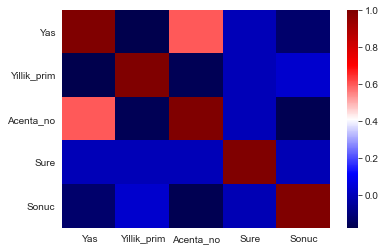

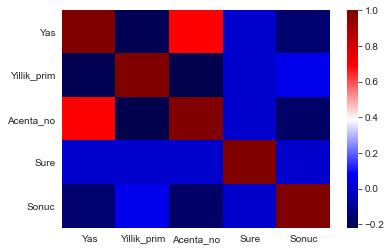

In [23]:
n_list = ["Yas","Yillik_prim","Acenta_no","Sure","Sonuc"]
sns.heatmap(df[["Yas","Yillik_prim","Acenta_no","Sure","Sonuc"]].corr(),cmap="seismic")
plt.show()
sns.heatmap(df[["Yas","Yillik_prim","Acenta_no","Sure","Sonuc"]].corr(method='spearman'),cmap="seismic")
plt.show()

#It seems acenta_no and Yas have some strong relationship.

In [25]:
df[["Yas","Yillik_prim","Acenta_no","Sure","Sonuc"]].corr(method='spearman')

,Yas,Yillik_prim,Acenta_no,Sure,Sonuc
Yas,1.000000,-0.208034,0.699706,0.003310,-0.159063
Yillik_prim,-0.208034,1.000000,-0.220061,0.001259,0.051769
Acenta_no,0.699706,-0.220061,1.000000,0.001985,-0.172490
Sure,0.003310,0.001259,0.001985,1.000000,-0.000878
Sonuc,-0.159063,0.051769,-0.172490,-0.000878,1.000000


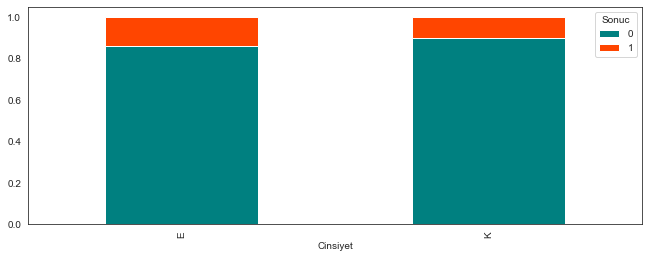

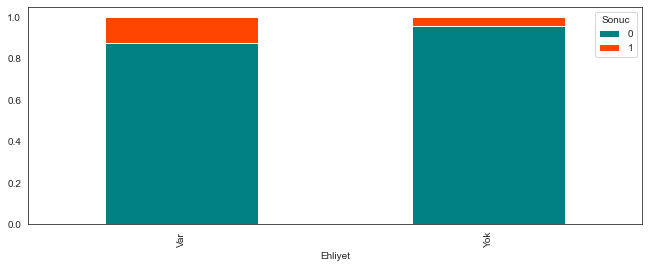

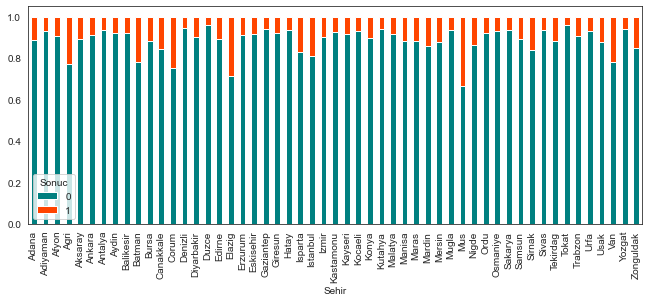

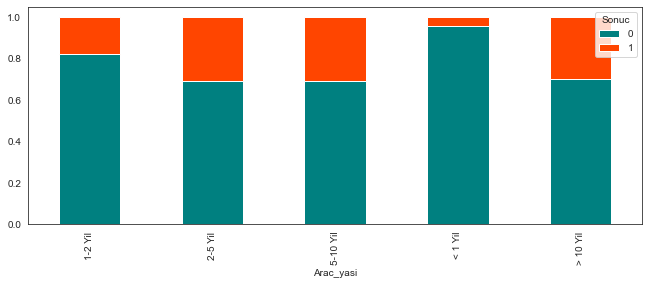

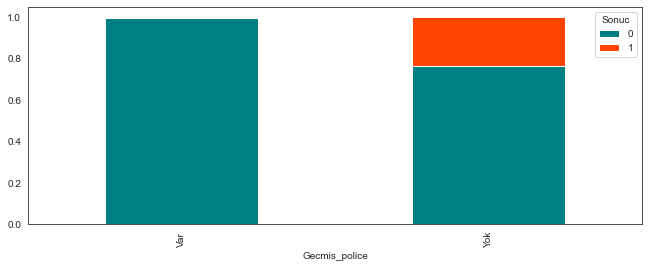

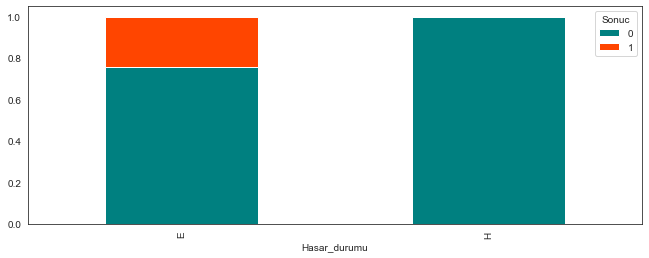

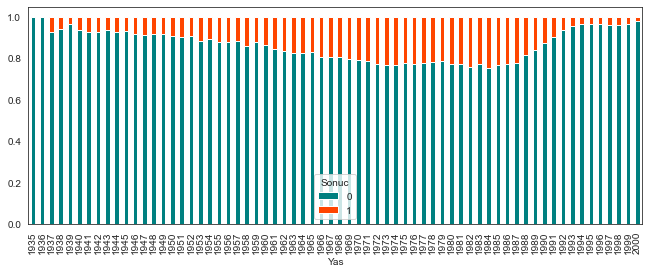

In [40]:
l = c_list+["Yas"]
for i in l :
    table=pd.crosstab(df[i], df.Sonuc)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(11,4), stacked=True,color=['teal','orangered','lightcoral'])
    plt.show()

1- Males has more positive ratio. Gender seems to have explanatory power,

2- People who have license have more positive ratio. I am planning to use for map function for these colums.

3- Sehir column is a good seperator. However it has too much category. Categories can be combined and a new column such as "Bolge"

4- Eastern Cities have more positive ratio. Bolge seems to be a fair variable.

5- As we expect, people who has insurace, do not have any positive value. 

6- People who had accident in the past seems to be more cautious

7- Old and young people seems to have less positive ratio. It seems fair considering they drive less. If I have time, I will try to make a new categoric feature which specifies old, young and middle age

# Feature Generation

In [7]:
df["Yıl"] = 2021
df["Yas_new"] = df["Yıl"] - df["Yas"]
df.drop(columns=["Yıl"],inplace=True)
df.head()

,Musteri_no,Cinsiyet,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc,Yas_new
0,301236,E,1985,Var,Ordu,Yok,1-2 Yil,E,2960.00,147,131,0,36
1,360545,E,1990,Var,Gaziantep,Var,< 1 Yil,H,3081.78,177,213,0,31
2,124745,E,1990,Var,Kocaeli,Yok,< 1 Yil,E,3672.67,177,72,0,31
3,72320,E,1995,Var,Izmir,Var,< 1 Yil,H,3599.89,177,117,0,26
4,226178,E,1998,Var,Kocaeli,Yok,< 1 Yil,E,3697.22,177,177,0,23


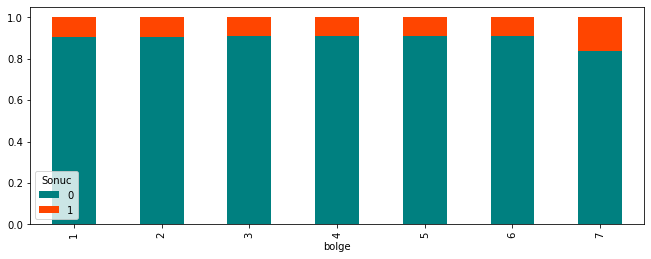

In [8]:
def bolge(sehir):
    b1 = ["Adana","Antalya","Hatay","Isparta","Mersin","Osmaniye","Maras"]
    b2 = ["Erzurum","Malatya","Van","Agri","Elazig","Mus"]
    b3 = ["Denizli","Kutahya","Manisa","Mugla","Afyon","Aydin","Izmir","Usak"]
    b4 = ["Batman","Gaziantep","Mardin","Adiyaman","Diyarbakir","Sirnak","Urfa"]
    b5 = ["Aksaray","Ankara","Kayseri","Konya","Nigde","Sivas","Yozgat","Eskisehir"]
    b6 = ["Corum","Duzce","Giresun","Kastamonu","Ordu","Samsun","Tokat","Trabzon","Zonguldak"]
    b7 = ["Bursa","Canakkale","Edirne","Kocaeli","Sakarya","Tekirdag","Balikesir","Istanbul"]
    if sehir in b1:
        return "1"
    elif sehir in b2:
        return "2"
    elif sehir in b3:
        return "3"
    elif sehir in b4:
        return "4"
    elif sehir in b5:
        return "5"
    elif sehir in b6:
        return "6"
    elif sehir in b7:
        return "7"
    else:
        return "7"
df["bolge"] = df["Sehir"].apply(lambda x : bolge(x))
df["bolge"].value_counts()
table=pd.crosstab(df.bolge, df.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(11,4), stacked=True,color=['teal','orangered','lightcoral'])
plt.show()

In [9]:
# It doesnt seem okay but I will keep it for now.

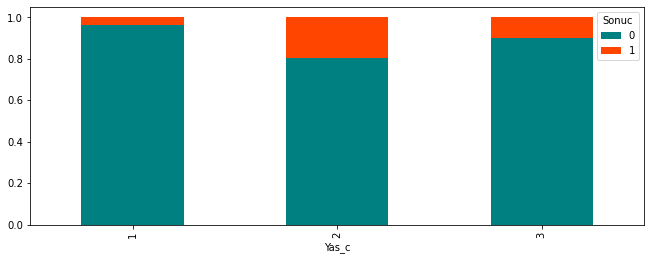

In [10]:
def ynew(y):
    if y >1992:
        return 1
    elif y <=1992 and y > 1958:
        return 2
    else:
        return 3
df["Yas_c"] = df["Yas"].apply(lambda x : ynew(x))
df["Yas_c"].value_counts()
table=pd.crosstab(df.Yas_c, df.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(11,4), stacked=True,color=['teal','orangered','lightcoral'])
plt.show()

In [11]:
# seems quite fine. I will keep it.

In [12]:
pd.DataFrame(df.Acenta_no.value_counts())[df.Acenta_no.value_counts() < 1000 ] # I will filter acenta_no and decrease categories to 15

,Acenta_no
55,934
80,890
180,845
36,807
77,761
...,...
100,1
108,1
122,1
124,1


In [13]:
pd.DataFrame(df.Acenta_no.value_counts())[df.Acenta_no.value_counts() < 1000 ].sum()

Acenta_no    14769
dtype: int64

In [14]:
ac_list = list(pd.DataFrame(df.Acenta_no.value_counts())[df.Acenta_no.value_counts() > 1000 ].Acenta_no.index)

In [15]:
ac_list

[177, 51, 149, 185, 147, 179, 176, 181, 182, 188, 38, 50, 32, 33]

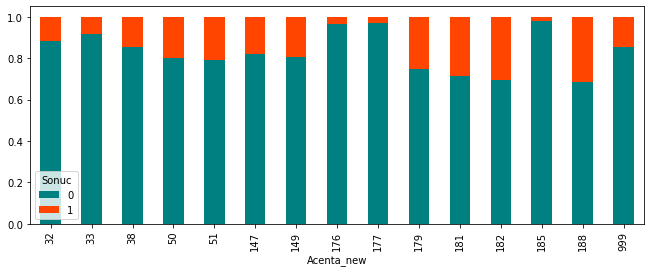

In [16]:
def acenta(ac_list,ac):
    if ac in ac_list:
        return ac
    else:
        return 999
df["Acenta_new"] = df["Acenta_no"].apply(lambda x : acenta(ac_list,x))
df["Acenta_new"].value_counts()
table=pd.crosstab(df.Acenta_new, df.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(11,4), stacked=True,color=['teal','orangered','lightcoral'])
plt.show()

In [17]:
# new acenta_no seems to be fine.

In [18]:
# Mapping arac yası

In [19]:
df["Arac_yasi"] = df["Arac_yasi"].map({'1-2 Yil':1, '< 1 Yil':0, '2-5 Yil':3, '5-10 Yil':4, '> 10 Yil':5})

In [20]:
pd.concat([df.describe(include="all").T,(round(100*(df.isnull().sum()/len(df.index)), 2)).rename('missing_ratio')], axis=1)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_ratio
Musteri_no,254687,NaN,NaN,NaN,210691,110048,20001,115380,210577,306056,401109,0.0
Cinsiyet,254687,2,E,136235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Yas,254687,NaN,NaN,NaN,1981.6,15.5884,1935,1971,1985,1996,2000,0.0
Ehliyet,254687,2,Var,254160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Sehir,254687,53,Istanbul,77761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Gecmis_police,254687,2,Yok,133227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Arac_yasi,254687,NaN,NaN,NaN,0.649326,0.778084,0,0,1,1,5,0.0
Hasar_durumu,254687,2,H,130014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Yillik_prim,254687,NaN,NaN,NaN,4009.91,1452.61,292.22,3153.44,3768,4588.22,60018.3,0.0
Acenta_no,254687,NaN,NaN,NaN,136.737,53.8973,26,54,149,177,188,0.0


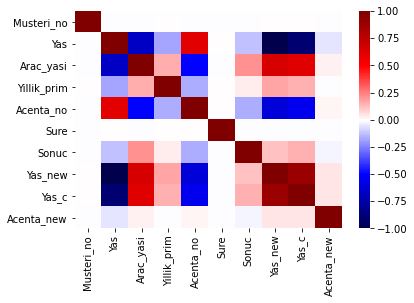

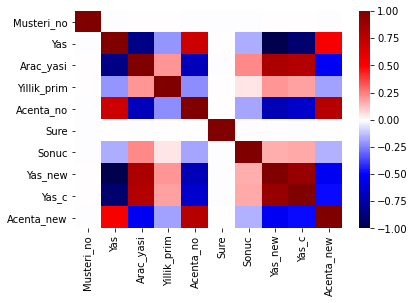

In [21]:
sns.heatmap(df.corr(),cmap="seismic")
plt.show()
sns.heatmap(df.corr(method='spearman'),cmap="seismic")
plt.show()

In [22]:
df.columns

Index(['Musteri_no', 'Cinsiyet', 'Yas', 'Ehliyet', 'Sehir', 'Gecmis_police',
       'Arac_yasi', 'Hasar_durumu', 'Yillik_prim', 'Acenta_no', 'Sure',
       'Sonuc', 'Yas_new', 'bolge', 'Yas_c', 'Acenta_new'],
      dtype='object')

# Modelling

I will try a model with new dataset (with new categoric features), and I will try one with original dataset. It will be spars after one hot encoding.

In [23]:
train_df= df[['Cinsiyet', 'Ehliyet', 'Gecmis_police','Arac_yasi', 'Hasar_durumu', 'Yillik_prim', 'Sure','Sonuc', 'Yas_new', 'bolge', 'Yas_c', 'Acenta_new']]
train_df

,Cinsiyet,Ehliyet,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Sure,Sonuc,Yas_new,bolge,Yas_c,Acenta_new
0,E,Var,Yok,1,E,2960.00,131,0,36,6,2,147
1,E,Var,Var,0,H,3081.78,213,0,31,4,2,177
2,E,Var,Yok,0,E,3672.67,72,0,31,7,2,177
3,E,Var,Var,0,H,3599.89,117,0,26,3,1,177
4,E,Var,Yok,0,E,3697.22,177,0,23,7,1,177
...,...,...,...,...,...,...,...,...,...,...,...,...
254682,K,Var,Yok,0,E,2788.56,193,0,25,6,1,177
254683,E,Var,Var,0,H,5461.44,197,0,21,5,1,185
254684,E,Var,Var,0,H,5433.78,35,0,29,4,2,177
254685,E,Var,Var,1,H,6406.11,31,0,54,5,2,51


In [77]:
train_df2= df[['Cinsiyet', 'Yas', 'Ehliyet', 'Sehir', 'Gecmis_police','Arac_yasi', 'Hasar_durumu', 'Yillik_prim', 'Acenta_no', 'Sure','Sonuc']]
train_df2.head()

,Cinsiyet,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc
0,E,1985,Var,Ordu,Yok,1,E,2960.00,147,131,0
1,E,1990,Var,Gaziantep,Var,0,H,3081.78,177,213,0
2,E,1990,Var,Kocaeli,Yok,0,E,3672.67,177,72,0
3,E,1995,Var,Izmir,Var,0,H,3599.89,177,117,0
4,E,1998,Var,Kocaeli,Yok,0,E,3697.22,177,177,0


In [25]:
#Required Functions

In [26]:
import matplotlib.cbook
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5),scoring="f1"):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid("on")
    return plt

In [1]:
def ROC_plotter(y_train_,y_test_,X_train_,X_test_,estimator):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    fpr, tpr, tresholds = met.roc_curve(y_train_ , estimator.predict_proba(X_train_)[:,1])
    roc_auc = met.roc_auc_score(y_train_ , estimator.predict_proba(X_train_)[:,1])
    plt.plot(fpr, tpr, label='ROC-AUC = %0.2f' % roc_auc, color='darkorange', linestyle='dashdot', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Train ')
    plt.legend(loc="lower right")
    plt.subplot(122)
    fpr, tpr, tresholds = met.roc_curve(y_test_ , estimator.predict_proba(X_test_)[:,1] )
    roc_auc = met.roc_auc_score(y_test_ , estimator.predict_proba(X_test_)[:,1])
    plt.plot(fpr, tpr, label='ROC-AUC = %0.2f' % roc_auc, color='darkorange', linestyle='dashdot', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Test')
    plt.legend(loc="lower right")
    plt.show()

def PrecisionRecallCurve(y_train_,y_test_,X_train_,X_test_,estimator):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.title("Precision vs Recall Training")
    precision, recall, tresholds = met.precision_recall_curve(y_train_,estimator.predict_proba(X_train_)[:,1])
    plt.plot(tresholds,precision[:-1],"--",color="navy",label="Precison: TP / (TP+FP)")
    plt.plot(tresholds,recall[:-1],"--",color="darkorange",label='Recall: TP / (TP+FN)')
    plt.legend()
    plt.subplot(122)
    plt.title("Precision vs Recall Test")
    precision, recall, tresholds = met.precision_recall_curve(y_test_,estimator.predict_proba(X_test_)[:,1])
    plt.plot(tresholds,precision[:-1],"--",color="navy",label="Precison: TP / (TP+FP)")
    plt.plot(tresholds,recall[:-1],"--",color="darkorange",label='Recall: TP / (TP+FN)')
    plt.legend()
    plt.show()
    
def PrecisionRecallCurve2(y_train_,y_test_,X_train_,X_test_,estimator):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.title("Precision vs Recall Training")
    precision, recall, tresholds = met.precision_recall_curve(y_train_,estimator.predict_proba(X_train_)[:,1])
    pr_auc = met.auc(recall, precision)
    plt.plot(recall,precision,"--",color="darkorange",label='LR (PR-AUC = %0.2f)' % pr_auc)
    no_skill = len(y_train_[y_train_==1]) / len(y_train_)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='navy', label='No Skill')
    plt.legend()
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.title("precision recall curve")
    plt.subplot(122)
    plt.title("Precision vs Recall Test")
    precision, recall, tresholds = met.precision_recall_curve(y_test_,estimator.predict_proba(X_test_)[:,1])
    pr_auc = met.auc(recall, precision)
    plt.plot(recall,precision,"--",color="darkorange",label='LR (PR-AUC = %0.2f)' % pr_auc)
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='navy', label='No Skill')
    plt.legend()
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.show()

# Random Forest with  dataset1

In [28]:
train_df.head(2)

,Cinsiyet,Ehliyet,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Sure,Sonuc,Yas_new,bolge,Yas_c,Acenta_new
0,E,Var,Yok,1,E,2960.00,131,0,36,6,2,147
1,E,Var,Var,0,H,3081.78,213,0,31,4,2,177


In [29]:
y = train_df["Sonuc"]
X = train_df.drop(columns=["Sonuc"])

In [30]:
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best CV score: 0.861702 using {'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_features': 7, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3}

Training
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    178844
           1       0.83      0.01      0.02     24905

    accuracy                           0.88    203749
   macro avg       0.85      0.50      0.48    203749
weighted avg       0.87      0.88      0.82    203749

Test
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44712
           1       0.50      0.00      0.01      6226

    accuracy                           0.88     50938
   macro avg       0.69      0.50      0.47     50938
weighted avg       0.83      0.88      0.82     50938



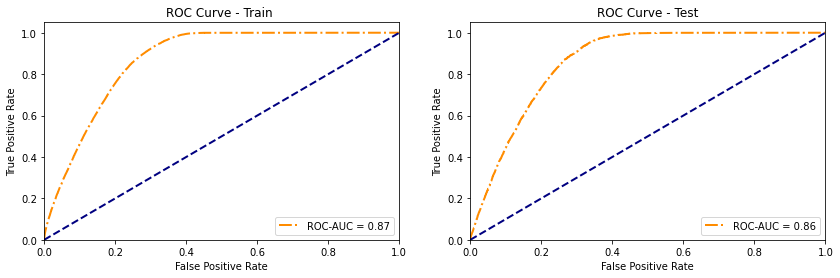

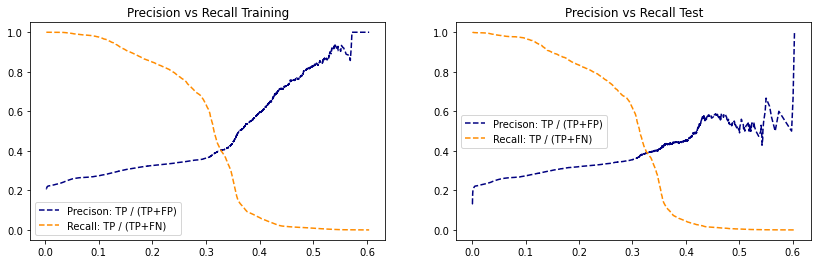

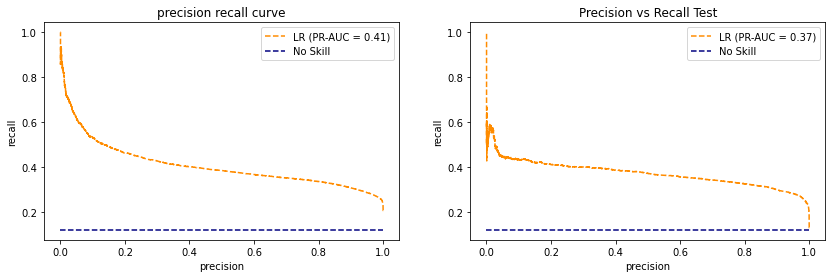

In [32]:
import warnings
warnings.filterwarnings('ignore') 


c = ['Cinsiyet', 'Ehliyet', 'Gecmis_police', 'Hasar_durumu','bolge','Yas_c','Acenta_new']

categoricTransformer = pip.Pipeline(steps=[("encoder",pre.OneHotEncoder(drop='first'))
                                         ])

preprocessor = cmp.ColumnTransformer([("nm",categoricTransformer,c)], remainder='passthrough')

pipeline = pip.Pipeline(steps=[ ('prep',preprocessor),
                                ('clf', ens.RandomForestClassifier(random_state=42))
                              ])
params = {
    'clf__criterion': ['gini']   ,   #['entropy', 'gini'], I have tried commented parameters and narrow the search
    'clf__max_features': [7]  ,  # [3,5,7],
    'clf__max_depth': [10]   ,       #[4,7,10],
    'clf__min_samples_leaf': [1],    #[1, 3],
    'clf__min_samples_split': [3],    #[1, 3],
    'clf__class_weight':[None]}      #["balanced",None]

kfold = mod.StratifiedKFold(n_splits=3)
grid  = mod.GridSearchCV(estimator=pipeline, param_grid=params, cv=kfold, scoring='roc_auc',verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
print(); print("Best CV score: %f using %s\n" % (grid.best_score_, grid.best_params_))
print("Training")
print(met.classification_report(y_train, grid.predict(X_train)))
print("Test")
print(met.classification_report(y_test, grid.predict(X_test)))
ROC_plotter(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve2(y_train,y_test,X_train,X_test,grid.best_estimator_)

AUC scores are quite close in training and test data. There is no sign of overfitting. However, performance in predicting positive class is not okay. Recall is too low. This may be related with default treshold 0.5. AUC score ignores model performance in positive class. I will check learning curves if there is any over/underfitting sign. I will also make a gridsearch to maximize f1 score to check if I can build a betrter model which can predickt positive class without lowering the AUC Score


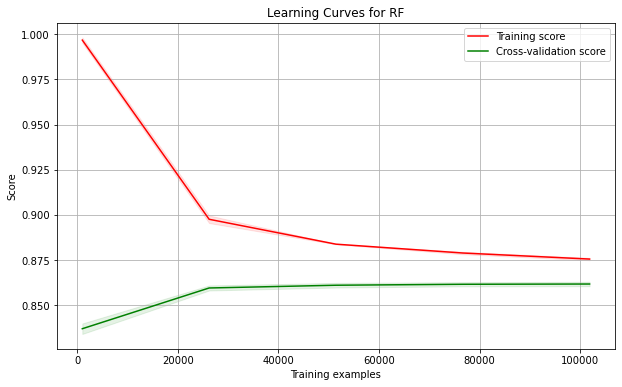

In [30]:
title = 'Learning Curves for RF'
kfold = mod.StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
plot_learning_curve(grid.best_estimator_, title, X_train, y_train, cv=kfold,scoring='roc_auc')
plt.show()

In [34]:
#First upload

In [36]:
df_test = pd.read_excel("Arac_test.xlsx")
df_test.head()

,Musteri_no,Cinsiyet,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure
0,173950,K,1995,Var,Kocaeli,Yok,< 1 Yil,H,2975.56,177,94
1,151093,K,1997,Var,Mersin,Var,< 1 Yil,H,2683.33,177,105
2,278004,E,1978,Var,Samsun,Yok,1-2 Yil,E,3982.78,149,76
3,264381,K,1995,Var,Antalya,Yok,1-2 Yil,E,2716.67,179,193
4,336347,K,1999,Var,Bursa,Var,< 1 Yil,H,3301.89,185,224


In [37]:
df_test["Yıl"] = 2021
df_test["Yas_new"] = df_test["Yıl"] - df_test["Yas"]
df.head()
def bolge(sehir):
    b1 = ["Adana","Antalya","Hatay","Isparta","Mersin","Osmaniye","Maras"]
    b2 = ["Erzurum","Malatya","Van","Agri","Elazig","Mus"]
    b3 = ["Denizli","Kutahya","Manisa","Mugla","Afyon","Aydin","Izmir","Usak"]
    b4 = ["Batman","Gaziantep","Mardin","Adiyaman","Diyarbakir","Sirnak","Urfa"]
    b5 = ["Aksaray","Ankara","Kayseri","Konya","Nigde","Sivas","Yozgat","Eskisehir"]
    b6 = ["Corum","Duzce","Giresun","Kastamonu","Ordu","Samsun","Tokat","Trabzon","Zonguldak"]
    b7 = ["Bursa","Canakkale","Edirne","Kocaeli","Sakarya","Tekirdag","Balikesir","Istanbul"]
    if sehir in b1:
        return "1"
    elif sehir in b2:
        return "2"
    elif sehir in b3:
        return "3"
    elif sehir in b4:
        return "4"
    elif sehir in b5:
        return "5"
    elif sehir in b6:
        return "6"
    elif sehir in b7:
        return "7"
    else:
        return "7"
df_test["bolge"] = df_test["Sehir"].apply(lambda x : bolge(x))

def ynew(y):
    if y >1992:
        return 1
    elif y <=1992 and y > 1958:
        return 2
    else:
        return 3
df_test["Yas_c"] = df_test["Yas"].apply(lambda x : ynew(x))

def acenta(ac_list,ac):
    if ac in ac_list:
        return ac
    else:
        return 999
df_test["Acenta_new"] = df_test["Acenta_no"].apply(lambda x : acenta(ac_list,x))
df_test["Acenta_new"].value_counts()
df_test["Arac_yasi"] = df_test["Arac_yasi"].map({'1-2 Yil':1, '< 1 Yil':0, '2-5 Yil':3, '5-10 Yil':4, '> 10 Yil':5})

In [38]:
df_test.head(2)

,Musteri_no,Cinsiyet,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Yıl,Yas_new,bolge,Yas_c,Acenta_new
0,173950,K,1995,Var,Kocaeli,Yok,0,H,2975.56,177,94,2021,26,7,1,177
1,151093,K,1997,Var,Mersin,Var,0,H,2683.33,177,105,2021,24,1,1,177


In [39]:
test_df= df_test[['Cinsiyet', 'Ehliyet', 'Gecmis_police','Arac_yasi', 'Hasar_durumu', 'Yillik_prim', 'Sure', 'Yas_new', 'bolge', 'Yas_c', 'Acenta_new']]
test_df.head(2)

,Cinsiyet,Ehliyet,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Sure,Yas_new,bolge,Yas_c,Acenta_new
0,K,Var,Yok,0,H,2975.56,94,26,7,1,177
1,K,Var,Var,0,H,2683.33,105,24,1,1,177


In [40]:
pred_prob1 = pd.DataFrame(grid.best_estimator_.predict_proba(test_df)[:,1],columns=["Prediction"])
pred = pred_prob1.reset_index().rename(columns={'index': 'ID'})
pred["ID"] = pred["ID"] + 1 # index 0dan baslayınca hata verdi. BU NOKTADA COK SURE KAYBETTIGIM ICIN FAZLA DENEME  YAPAMADIM
pred.to_csv('pred.csv', index=False)

In [41]:
pred_prob1.reset_index().rename(columns={'index': 'ID'}).to_csv('pred.csv', index=False)

In [ ]:
#pd.concat((df_test.index,pred_prob1),axis=1).rename(columns={'Musteri_no': 'ID'}).to_csv('pred.csv', index=False)

# RF Trial 2

Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best CV score: 0.441088 using {'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_features': 7, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3}

Training
              precision    recall  f1-score   support

           0       0.99      0.68      0.81    178844
           1       0.29      0.94      0.45     24905

    accuracy                           0.71    203749
   macro avg       0.64      0.81      0.63    203749
weighted avg       0.90      0.71      0.76    203749

Test
              precision    recall  f1-score   support

           0       0.99      0.68      0.81     44712
           1       0.29      0.93      0.44      6226

    accuracy                           0.71     50938
   macro avg       0.64      0.81      0.62     50938
weighted avg       0.90      0.71      0.76     50938



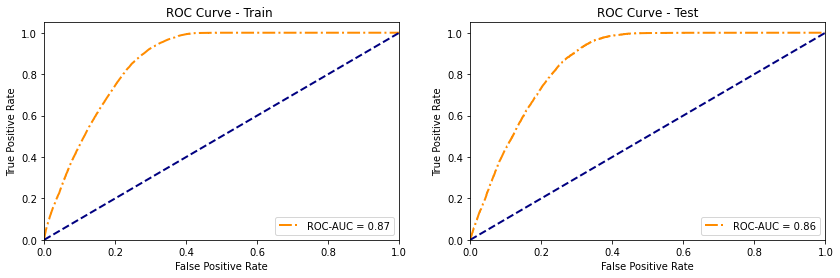

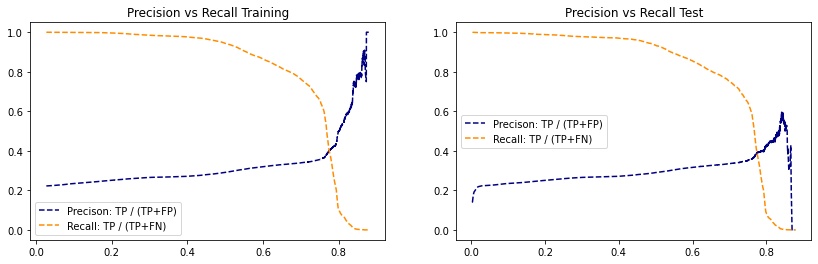

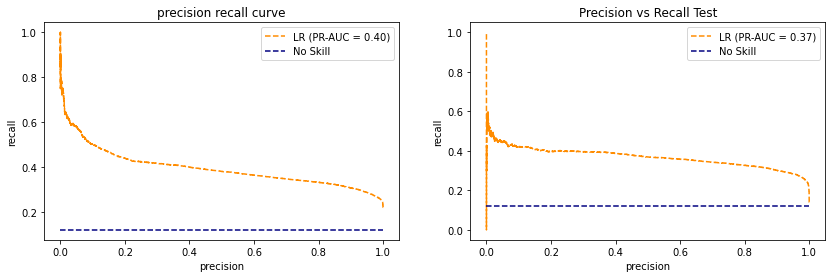

In [50]:
import warnings
warnings.filterwarnings('ignore') 


c = ['Cinsiyet', 'Ehliyet', 'Gecmis_police', 'Hasar_durumu','bolge','Yas_c','Acenta_new']

categoricTransformer = pip.Pipeline(steps=[("encoder",pre.OneHotEncoder(drop='first'))
                                         ])

preprocessor = cmp.ColumnTransformer([("nm",categoricTransformer,c)], remainder='passthrough')

pipeline = pip.Pipeline(steps=[ ('prep',preprocessor),
                                ('clf', ens.RandomForestClassifier(random_state=42))
                              ])
params = {
    'clf__criterion': ['gini']   ,   #['entropy', 'gini'], I have tried commented parameters and narrow the search
    'clf__max_features': [7]  ,                # [3,5,7],
    'clf__max_depth': [10]   ,                 #[4,7,10],
    'clf__min_samples_leaf': [1],              #[1, 3],
    'clf__min_samples_split': [3],             #[1, 3],
    'clf__class_weight':["balanced"]}     #["balanced",None]

kfold = mod.StratifiedKFold(n_splits=3)
grid  = mod.GridSearchCV(estimator=pipeline, param_grid=params, cv=kfold, scoring='f1',verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
print(); print("Best CV score: %f using %s\n" % (grid.best_score_, grid.best_params_))
print("Training")
print(met.classification_report(y_train, grid.predict(X_train)))
print("Test")
print(met.classification_report(y_test, grid.predict(X_test)))
ROC_plotter(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve2(y_train,y_test,X_train,X_test,grid.best_estimator_)

In [44]:
#AUC Scores are same but recall of positive class is quite better.

In [45]:
# 2'nd submission

In [51]:
df_test = pd.read_excel("Arac_test.xlsx")
df_test.head()
df_test["Yıl"] = 2021
df_test["Yas_new"] = df_test["Yıl"] - df_test["Yas"]
df.head()
def bolge(sehir):
    b1 = ["Adana","Antalya","Hatay","Isparta","Mersin","Osmaniye","Maras"]
    b2 = ["Erzurum","Malatya","Van","Agri","Elazig","Mus"]
    b3 = ["Denizli","Kutahya","Manisa","Mugla","Afyon","Aydin","Izmir","Usak"]
    b4 = ["Batman","Gaziantep","Mardin","Adiyaman","Diyarbakir","Sirnak","Urfa"]
    b5 = ["Aksaray","Ankara","Kayseri","Konya","Nigde","Sivas","Yozgat","Eskisehir"]
    b6 = ["Corum","Duzce","Giresun","Kastamonu","Ordu","Samsun","Tokat","Trabzon","Zonguldak"]
    b7 = ["Bursa","Canakkale","Edirne","Kocaeli","Sakarya","Tekirdag","Balikesir","Istanbul"]
    if sehir in b1:
        return "1"
    elif sehir in b2:
        return "2"
    elif sehir in b3:
        return "3"
    elif sehir in b4:
        return "4"
    elif sehir in b5:
        return "5"
    elif sehir in b6:
        return "6"
    elif sehir in b7:
        return "7"
    else:
        return "7"
df_test["bolge"] = df_test["Sehir"].apply(lambda x : bolge(x))

def ynew(y):
    if y >1992:
        return 1
    elif y <=1992 and y > 1958:
        return 2
    else:
        return 3
df_test["Yas_c"] = df_test["Yas"].apply(lambda x : ynew(x))

def acenta(ac_list,ac):
    if ac in ac_list:
        return ac
    else:
        return 999
df_test["Acenta_new"] = df_test["Acenta_no"].apply(lambda x : acenta(ac_list,x))
df_test["Acenta_new"].value_counts()
df_test["Arac_yasi"] = df_test["Arac_yasi"].map({'1-2 Yil':1, '< 1 Yil':0, '2-5 Yil':3, '5-10 Yil':4, '> 10 Yil':5})
test_df= df_test[['Cinsiyet', 'Ehliyet', 'Gecmis_police','Arac_yasi', 'Hasar_durumu', 'Yillik_prim', 'Sure', 'Yas_new', 'bolge', 'Yas_c', 'Acenta_new']]
test_df.head()

,Cinsiyet,Ehliyet,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Sure,Yas_new,bolge,Yas_c,Acenta_new
0,K,Var,Yok,0,H,2975.56,94,26,7,1,177
1,K,Var,Var,0,H,2683.33,105,24,1,1,177
2,E,Var,Yok,1,E,3982.78,76,43,6,2,149
3,K,Var,Yok,1,E,2716.67,193,26,1,1,179
4,K,Var,Var,0,H,3301.89,224,22,7,1,185


In [53]:
pred_prob2 = pd.DataFrame(grid.best_estimator_.predict_proba(test_df)[:,1],columns=["Prediction"])
pred = pred_prob2.reset_index().rename(columns={'index': 'ID'})
pred["ID"] = pred["ID"] + 1 # index 0dan baslayınca hata verdi. 
pred.to_csv('pred.csv', index=False)

# XGB 1

In [55]:
y = train_df["Sonuc"]
X = train_df.drop(columns=["Sonuc"])
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)


In [ ]:
c = ['Cinsiyet', 'Ehliyet', 'Gecmis_police', 'Hasar_durumu','bolge','Yas_c','Acenta_new']

categoricTransformer = pip.Pipeline(steps=[("encoder",pre.OneHotEncoder(drop='first'))
                                         ])

preprocessor = cmp.ColumnTransformer([("nm",categoricTransformer,c)], remainder='passthrough')

lrList = [0.07,0.1, 0.3,0.5]
plt.figure(figsize=(15,12))
j = 0
for lr in lrList:
    j += 1 
    trn_loss = [] ; val_loss = []
    for nest in np.linspace(50,200,50, dtype=int):
        pipeline = pip.Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',   XGBClassifier(n_estimators=nest, eval_metric='logloss',learning_rate=lr,verbosity = 0, verbose=0, n_jobs=-1))
                          ])
        pipeline.fit(X_train, y_train)
        trn_loss.append(met.log_loss(y_train, pipeline.predict_proba(X_train)))
        val_loss.append(met.log_loss(y_test, pipeline.predict_proba(X_test)))
    plt.subplot(2,3,j)
    plt.plot(np.linspace(50,200,50, dtype=int), trn_loss, '-r', label='training_loss')
    plt.plot(np.linspace(50,200,50, dtype=int), val_loss, '-b', label='val_loss')
    plt.title("Learning rate = {0}".format(lr))
    plt.ylabel('Error')
    plt.xlabel('num_components')
    plt.legend(loc='upper right')
plt.show()

In [ ]:
#  learning rate 0.3 and n estimator 80 seems quite okay. Because of the training time, this combination seems to be fine.

Fitting 2 folds for each of 8 candidates, totalling 16 fits

Best CV score: 0.860210 using {'clf__gamma': 5, 'clf__learning_rate': 0.3, 'clf__max_depth': 8, 'clf__min_child_weight': 50, 'clf__n_estimators': 80}

Training
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    149782
           1       0.60      0.02      0.05     20858

    accuracy                           0.88    170640
   macro avg       0.74      0.51      0.49    170640
weighted avg       0.85      0.88      0.83    170640

Test
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     73774
           1       0.48      0.02      0.04     10273

    accuracy                           0.88     84047
   macro avg       0.68      0.51      0.49     84047
weighted avg       0.83      0.88      0.82     84047



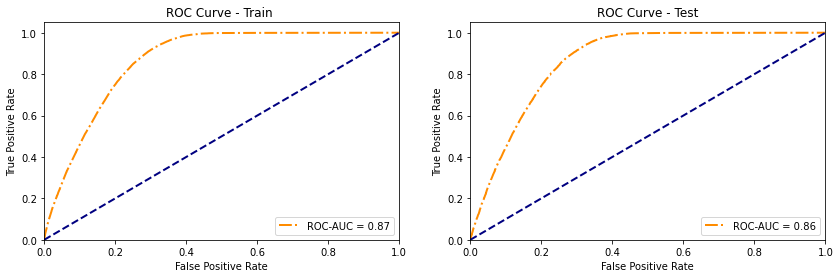

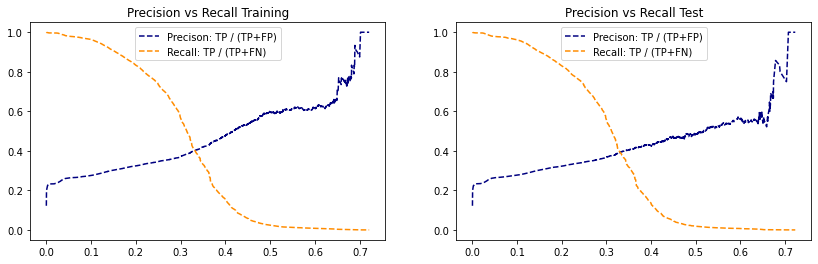

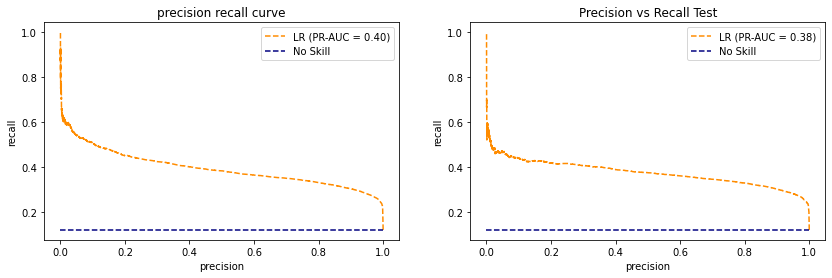

In [60]:

c = ['Cinsiyet', 'Ehliyet', 'Gecmis_police', 'Hasar_durumu','bolge','Yas_c','Acenta_new']

categoricTransformer = pip.Pipeline(steps=[("encoder",pre.OneHotEncoder(drop='first'))
                                         ])

preprocessor = cmp.ColumnTransformer([("nm",categoricTransformer,c)], remainder='passthrough')

pipeline = pip.Pipeline(steps=[ ('prep',preprocessor),
                                ('clf', XGBClassifier(eval_metric='logloss',verbosity = 0, verbose=0, n_jobs=-1,random_state=42))
                              ])
params = { 
              'clf__learning_rate'    : [0.3],
              'clf__n_estimators'     : [80],
              'clf__max_depth'        : [8,10],#[4,6,8,10]
              'clf__min_child_weight' : [50],  # [30,50,150]
              'clf__gamma'            : [1,5], # [1,5,10,50]
              #'clf__subsample'       : [ 0.9, 1],
              #'clf__colsample_bytree': [ 0.9, 1],
              #'clf__reg_alpha'        : [ 1, 3],
              #'clf__reg_lambda'       : [ 2, 3]
              #'clf__class_pos_weigh' : [1, 10, 25, 50, 75, 99, 100, 1000,    
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[0]),
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[1])]
              #'clf__early_stopping_rounds' : [10]
            }

kfold = mod.StratifiedKFold(n_splits=2)
grid  = mod.GridSearchCV(estimator=pipeline, param_grid=params, cv=kfold, scoring='roc_auc',verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
print(); print("Best CV score: %f using %s\n" % (grid.best_score_, grid.best_params_))
print("Training")
print(met.classification_report(y_train, grid.predict(X_train)))
print("Test")
print(met.classification_report(y_test, grid.predict(X_test)))
ROC_plotter(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve2(y_train,y_test,X_train,X_test,grid.best_estimator_)

In [63]:
# Not much improvement on RF Model. However it performed on unseen test data on kaggle. 
# I will make one more trial.


In [62]:
df_test = pd.read_excel("Arac_test.xlsx")
df_test.head()
df_test["Yıl"] = 2021
df_test["Yas_new"] = df_test["Yıl"] - df_test["Yas"]
df.head()
def bolge(sehir):
    b1 = ["Adana","Antalya","Hatay","Isparta","Mersin","Osmaniye","Maras"]
    b2 = ["Erzurum","Malatya","Van","Agri","Elazig","Mus"]
    b3 = ["Denizli","Kutahya","Manisa","Mugla","Afyon","Aydin","Izmir","Usak"]
    b4 = ["Batman","Gaziantep","Mardin","Adiyaman","Diyarbakir","Sirnak","Urfa"]
    b5 = ["Aksaray","Ankara","Kayseri","Konya","Nigde","Sivas","Yozgat","Eskisehir"]
    b6 = ["Corum","Duzce","Giresun","Kastamonu","Ordu","Samsun","Tokat","Trabzon","Zonguldak"]
    b7 = ["Bursa","Canakkale","Edirne","Kocaeli","Sakarya","Tekirdag","Balikesir","Istanbul"]
    if sehir in b1:
        return "1"
    elif sehir in b2:
        return "2"
    elif sehir in b3:
        return "3"
    elif sehir in b4:
        return "4"
    elif sehir in b5:
        return "5"
    elif sehir in b6:
        return "6"
    elif sehir in b7:
        return "7"
    else:
        return "7"
df_test["bolge"] = df_test["Sehir"].apply(lambda x : bolge(x))

def ynew(y):
    if y >1992:
        return 1
    elif y <=1992 and y > 1958:
        return 2
    else:
        return 3
df_test["Yas_c"] = df_test["Yas"].apply(lambda x : ynew(x))

def acenta(ac_list,ac):
    if ac in ac_list:
        return ac
    else:
        return 999
df_test["Acenta_new"] = df_test["Acenta_no"].apply(lambda x : acenta(ac_list,x))
df_test["Acenta_new"].value_counts()
df_test["Arac_yasi"] = df_test["Arac_yasi"].map({'1-2 Yil':1, '< 1 Yil':0, '2-5 Yil':3, '5-10 Yil':4, '> 10 Yil':5})
test_df= df_test[['Cinsiyet', 'Ehliyet', 'Gecmis_police','Arac_yasi', 'Hasar_durumu', 'Yillik_prim', 'Sure', 'Yas_new', 'bolge', 'Yas_c', 'Acenta_new']]
test_df.head()
pred_prob3 = pd.DataFrame(grid.best_estimator_.predict_proba(test_df)[:,1],columns=["Prediction"])
pred = pred_prob3.reset_index().rename(columns={'index': 'ID'})
pred["ID"] = pred["ID"] + 1 # index 0dan baslayınca hata verdi. 
pred.to_csv('pred.csv', index=False)

# XGB Second Trial

Fitting 2 folds for each of 18 candidates, totalling 36 fits

Best CV score: 0.861510 using {'clf__gamma': 9, 'clf__learning_rate': 0.3, 'clf__max_depth': 6, 'clf__min_child_weight': 10, 'clf__n_estimators': 80}

Training
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    149782
           1       0.62      0.02      0.03     20858

    accuracy                           0.88    170640
   macro avg       0.75      0.51      0.48    170640
weighted avg       0.85      0.88      0.82    170640

Test
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     73774
           1       0.53      0.01      0.03     10273

    accuracy                           0.88     84047
   macro avg       0.71      0.51      0.48     84047
weighted avg       0.84      0.88      0.82     84047



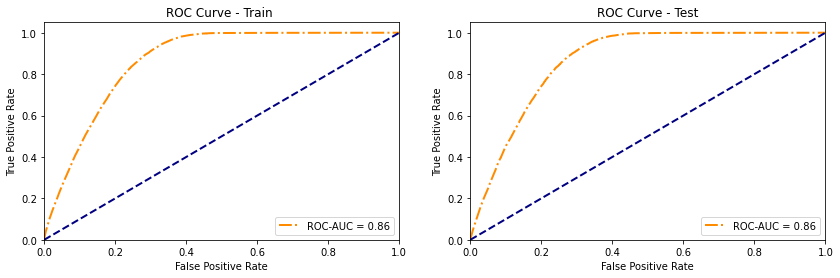

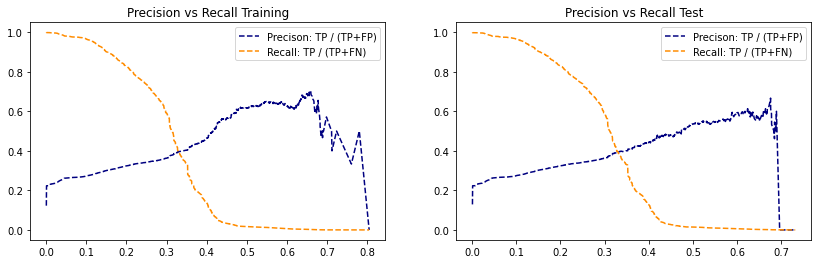

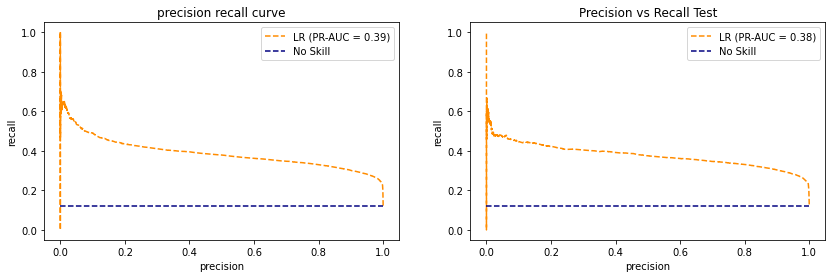

In [64]:

c = ['Cinsiyet', 'Ehliyet', 'Gecmis_police', 'Hasar_durumu','bolge','Yas_c','Acenta_new']

categoricTransformer = pip.Pipeline(steps=[("encoder",pre.OneHotEncoder(drop='first'))
                                         ])

preprocessor = cmp.ColumnTransformer([("nm",categoricTransformer,c)], remainder='passthrough')

pipeline = pip.Pipeline(steps=[ ('prep',preprocessor),
                                ('clf', XGBClassifier(eval_metric='logloss',verbosity = 0, verbose=0, n_jobs=-1,random_state=42))
                              ])
params = { 
              'clf__learning_rate'    : [0.3],
              'clf__n_estimators'     : [80],
              'clf__max_depth'        : [6,8],
              'clf__min_child_weight' : [10,20,30], # [30,50,150]
              'clf__gamma'            : [3,5,9], # [1,5,10,50]
              #'clf__subsample'       : [ 0.9, 1],
              #'clf__colsample_bytree': [ 0.9, 1],
              #'clf__reg_alpha'        : [ 1, 3],
              #'clf__reg_lambda'       : [ 2, 3]
              #'clf__class_pos_weigh' : [1, 10, 25, 50, 75, 99, 100, 1000,    
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[0]),
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[1])]
              #'clf__early_stopping_rounds' : [10]
            }

kfold = mod.StratifiedKFold(n_splits=2)
grid  = mod.GridSearchCV(estimator=pipeline, param_grid=params, cv=kfold, scoring='roc_auc',verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
print(); print("Best CV score: %f using %s\n" % (grid.best_score_, grid.best_params_))
print("Training")
print(met.classification_report(y_train, grid.predict(X_train)))
print("Test")
print(met.classification_report(y_test, grid.predict(X_test)))
ROC_plotter(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve2(y_train,y_test,X_train,X_test,grid.best_estimator_)

In [67]:
# very small improvement in cv score
# kaggle score also improved. 
# I will keep lowering regularization parameters.

In [66]:
df_test = pd.read_excel("Arac_test.xlsx")
df_test.head()
df_test["Yıl"] = 2021
df_test["Yas_new"] = df_test["Yıl"] - df_test["Yas"]
df.head()
def bolge(sehir):
    b1 = ["Adana","Antalya","Hatay","Isparta","Mersin","Osmaniye","Maras"]
    b2 = ["Erzurum","Malatya","Van","Agri","Elazig","Mus"]
    b3 = ["Denizli","Kutahya","Manisa","Mugla","Afyon","Aydin","Izmir","Usak"]
    b4 = ["Batman","Gaziantep","Mardin","Adiyaman","Diyarbakir","Sirnak","Urfa"]
    b5 = ["Aksaray","Ankara","Kayseri","Konya","Nigde","Sivas","Yozgat","Eskisehir"]
    b6 = ["Corum","Duzce","Giresun","Kastamonu","Ordu","Samsun","Tokat","Trabzon","Zonguldak"]
    b7 = ["Bursa","Canakkale","Edirne","Kocaeli","Sakarya","Tekirdag","Balikesir","Istanbul"]
    if sehir in b1:
        return "1"
    elif sehir in b2:
        return "2"
    elif sehir in b3:
        return "3"
    elif sehir in b4:
        return "4"
    elif sehir in b5:
        return "5"
    elif sehir in b6:
        return "6"
    elif sehir in b7:
        return "7"
    else:
        return "7"
df_test["bolge"] = df_test["Sehir"].apply(lambda x : bolge(x))

def ynew(y):
    if y >1992:
        return 1
    elif y <=1992 and y > 1958:
        return 2
    else:
        return 3
df_test["Yas_c"] = df_test["Yas"].apply(lambda x : ynew(x))

def acenta(ac_list,ac):
    if ac in ac_list:
        return ac
    else:
        return 999
df_test["Acenta_new"] = df_test["Acenta_no"].apply(lambda x : acenta(ac_list,x))
df_test["Acenta_new"].value_counts()
df_test["Arac_yasi"] = df_test["Arac_yasi"].map({'1-2 Yil':1, '< 1 Yil':0, '2-5 Yil':3, '5-10 Yil':4, '> 10 Yil':5})
test_df= df_test[['Cinsiyet', 'Ehliyet', 'Gecmis_police','Arac_yasi', 'Hasar_durumu', 'Yillik_prim', 'Sure', 'Yas_new', 'bolge', 'Yas_c', 'Acenta_new']]
test_df.head()
pred_prob4 = pd.DataFrame(grid.best_estimator_.predict_proba(test_df)[:,1],columns=["Prediction"])
pred = pred_prob4.reset_index().rename(columns={'index': 'ID'})
pred["ID"] = pred["ID"] + 1 # index 0dan baslayınca hata verdi. 
pred.to_csv('pred.csv', index=False)

# XGB Third Trial - Selected Model

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best CV score: 0.861787 using {'clf__gamma': 8, 'clf__learning_rate': 0.3, 'clf__max_depth': 8, 'clf__min_child_weight': 5, 'clf__n_estimators': 80, 'clf__reg_alpha': 1, 'clf__reg_lambda': 1}

Training
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    149782
           1       0.61      0.02      0.03     20858

    accuracy                           0.88    170640
   macro avg       0.75      0.51      0.49    170640
weighted avg       0.85      0.88      0.83    170640

Test
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     73774
           1       0.51      0.01      0.03     10273

    accuracy                           0.88     84047
   macro avg       0.69      0.51      0.48     84047
weighted avg       0.83      0.88      0.82     84047



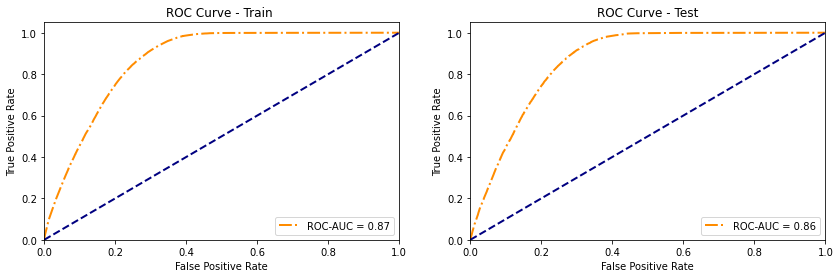

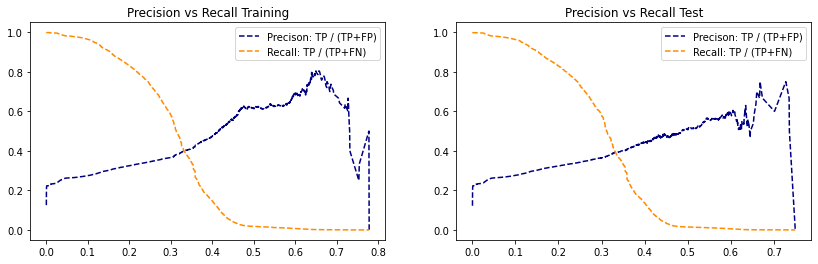

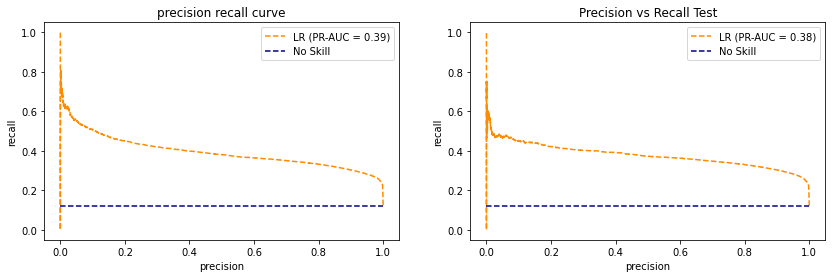

In [69]:

c = ['Cinsiyet', 'Ehliyet', 'Gecmis_police', 'Hasar_durumu','bolge','Yas_c','Acenta_new']

categoricTransformer = pip.Pipeline(steps=[("encoder",pre.OneHotEncoder(drop='first'))
                                         ])

preprocessor = cmp.ColumnTransformer([("nm",categoricTransformer,c)], remainder='passthrough')

pipeline = pip.Pipeline(steps=[ ('prep',preprocessor),
                                ('clf', XGBClassifier(eval_metric='logloss',verbosity = 0, verbose=0, n_jobs=-1,random_state=42))
                              ])
params = { 
              'clf__learning_rate'    : [0.3],
              'clf__n_estimators'     : [80],
              'clf__max_depth'        : [6,8],
              'clf__min_child_weight' : [5,10], # [30,50,150]
              'clf__gamma'            : [5,8,11], # [1,5,10,50]
              #'clf__subsample'       : [ 0.9, 1],
              #'clf__colsample_bytree': [ 0.9, 1],
              'clf__reg_alpha'        : [ 1],
              'clf__reg_lambda'       : [ 1]
              #'clf__class_pos_weigh' : [1, 10, 25, 50, 75, 99, 100, 1000,    
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[0]),
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[1])]
              #'clf__early_stopping_rounds' : [10]
            }

kfold = mod.StratifiedKFold(n_splits=3)
grid  = mod.GridSearchCV(estimator=pipeline, param_grid=params, cv=kfold, scoring='roc_auc',verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
print(); print("Best CV score: %f using %s\n" % (grid.best_score_, grid.best_params_))
print("Training")
print(met.classification_report(y_train, grid.predict(X_train)))
print("Test")
print(met.classification_report(y_test, grid.predict(X_test)))
ROC_plotter(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve2(y_train,y_test,X_train,X_test,grid.best_estimator_)

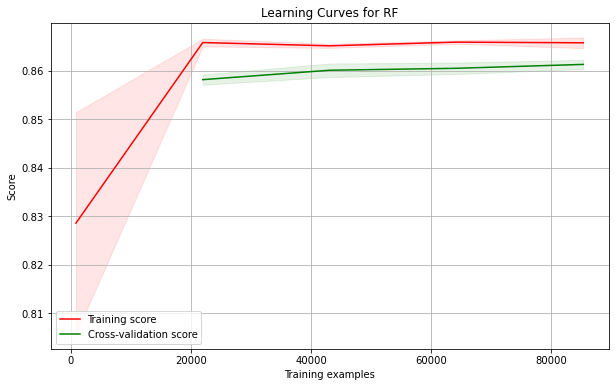

In [72]:
title = 'Learning Curves for RF'
kfold = mod.StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
plot_learning_curve(grid.best_estimator_, title, X_train, y_train, cv=kfold,scoring='roc_auc')
plt.show()

In [70]:
# very little improvement again. I will make one more xgboost submission.

In [71]:
df_test = pd.read_excel("Arac_test.xlsx")
df_test.head()
df_test["Yıl"] = 2021
df_test["Yas_new"] = df_test["Yıl"] - df_test["Yas"]
df.head()
def bolge(sehir):
    b1 = ["Adana","Antalya","Hatay","Isparta","Mersin","Osmaniye","Maras"]
    b2 = ["Erzurum","Malatya","Van","Agri","Elazig","Mus"]
    b3 = ["Denizli","Kutahya","Manisa","Mugla","Afyon","Aydin","Izmir","Usak"]
    b4 = ["Batman","Gaziantep","Mardin","Adiyaman","Diyarbakir","Sirnak","Urfa"]
    b5 = ["Aksaray","Ankara","Kayseri","Konya","Nigde","Sivas","Yozgat","Eskisehir"]
    b6 = ["Corum","Duzce","Giresun","Kastamonu","Ordu","Samsun","Tokat","Trabzon","Zonguldak"]
    b7 = ["Bursa","Canakkale","Edirne","Kocaeli","Sakarya","Tekirdag","Balikesir","Istanbul"]
    if sehir in b1:
        return "1"
    elif sehir in b2:
        return "2"
    elif sehir in b3:
        return "3"
    elif sehir in b4:
        return "4"
    elif sehir in b5:
        return "5"
    elif sehir in b6:
        return "6"
    elif sehir in b7:
        return "7"
    else:
        return "7"
df_test["bolge"] = df_test["Sehir"].apply(lambda x : bolge(x))

def ynew(y):
    if y >1992:
        return 1
    elif y <=1992 and y > 1958:
        return 2
    else:
        return 3
df_test["Yas_c"] = df_test["Yas"].apply(lambda x : ynew(x))

def acenta(ac_list,ac):
    if ac in ac_list:
        return ac
    else:
        return 999
df_test["Acenta_new"] = df_test["Acenta_no"].apply(lambda x : acenta(ac_list,x))
df_test["Acenta_new"].value_counts()
df_test["Arac_yasi"] = df_test["Arac_yasi"].map({'1-2 Yil':1, '< 1 Yil':0, '2-5 Yil':3, '5-10 Yil':4, '> 10 Yil':5})
test_df= df_test[['Cinsiyet', 'Ehliyet', 'Gecmis_police','Arac_yasi', 'Hasar_durumu', 'Yillik_prim', 'Sure', 'Yas_new', 'bolge', 'Yas_c', 'Acenta_new']]
test_df.head()
pred_prob5 = pd.DataFrame(grid.best_estimator_.predict_proba(test_df)[:,1],columns=["Prediction"])
pred = pred_prob5.reset_index().rename(columns={'index': 'ID'})
pred["ID"] = pred["ID"] + 1 # index 0dan baslayınca hata verdi. 
pred.to_csv('pred.csv', index=False)

# XGB Trial 4

Fitting 2 folds for each of 48 candidates, totalling 96 fits

Best CV score: 0.861689 using {'clf__gamma': 5, 'clf__learning_rate': 0.3, 'clf__max_depth': 6, 'clf__min_child_weight': 5, 'clf__n_estimators': 80, 'clf__reg_alpha': 1, 'clf__reg_lambda': 1}

Training
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    149782
           1       0.64      0.03      0.05     20858

    accuracy                           0.88    170640
   macro avg       0.76      0.51      0.49    170640
weighted avg       0.85      0.88      0.83    170640

Test
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     73774
           1       0.49      0.02      0.04     10273

    accuracy                           0.88     84047
   macro avg       0.69      0.51      0.49     84047
weighted avg       0.83      0.88      0.83     84047



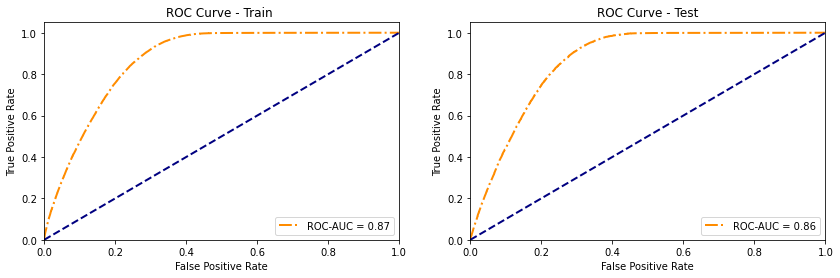

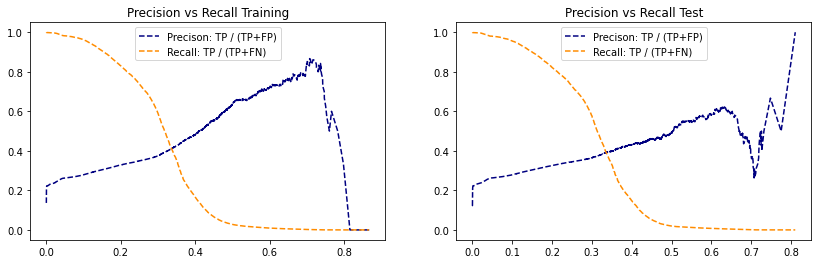

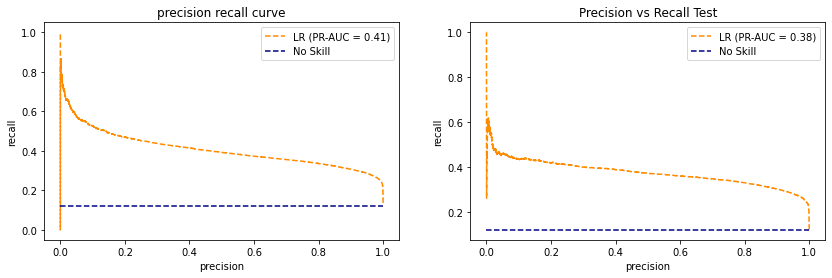

In [74]:

c = ['Cinsiyet', 'Ehliyet', 'Gecmis_police', 'Hasar_durumu','bolge','Yas_c','Acenta_new']

categoricTransformer = pip.Pipeline(steps=[("encoder",pre.OneHotEncoder(drop='first'))
                                         ])

preprocessor = cmp.ColumnTransformer([("nm",categoricTransformer,c)], remainder='passthrough')

pipeline = pip.Pipeline(steps=[ ('prep',preprocessor),
                                ('clf', XGBClassifier(eval_metric='logloss',verbosity = 0, verbose=0, n_jobs=-1,random_state=42))
                              ])
params = { 
              'clf__learning_rate'    : [0.3],
              'clf__n_estimators'     : [80],
              'clf__max_depth'        : [4,6,8],
              'clf__min_child_weight' : [3,5], # [30,50,150]
              'clf__gamma'            : [5,8], # [1,5,10,50]
              #'clf__subsample'       : [ 0.9, 1],
              #'clf__colsample_bytree': [ 0.9, 1],
              'clf__reg_alpha'        : [ 1,2],
              'clf__reg_lambda'       : [ 1,2]
              #'clf__class_pos_weigh' : [1, 10, 25, 50, 75, 99, 100, 1000,    
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[0]),
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[1])]
              #'clf__early_stopping_rounds' : [10]
            }

kfold = mod.StratifiedKFold(n_splits=2)
grid  = mod.GridSearchCV(estimator=pipeline, param_grid=params, cv=kfold, scoring='roc_auc',verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
print(); print("Best CV score: %f using %s\n" % (grid.best_score_, grid.best_params_))
print("Training")
print(met.classification_report(y_train, grid.predict(X_train)))
print("Test")
print(met.classification_report(y_test, grid.predict(X_test)))
ROC_plotter(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve2(y_train,y_test,X_train,X_test,grid.best_estimator_)

# XGB Trial with original sparse(after encoding) TrainSet - Best Private Performance

In [79]:
#df[['Cinsiyet', 'Yas', 'Ehliyet', 'Sehir', 'Gecmis_police','Arac_yasi', 'Hasar_durumu', 'Yillik_prim', 'Acenta_no', 'Sure','Sonuc']]
train_df2.head()

,Cinsiyet,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc
0,E,1985,Var,Ordu,Yok,1,E,2960.00,147,131,0
1,E,1990,Var,Gaziantep,Var,0,H,3081.78,177,213,0
2,E,1990,Var,Kocaeli,Yok,0,E,3672.67,177,72,0
3,E,1995,Var,Izmir,Var,0,H,3599.89,177,117,0
4,E,1998,Var,Kocaeli,Yok,0,E,3697.22,177,177,0


Fitting 2 folds for each of 2 candidates, totalling 4 fits

Best CV score: 0.863415 using {'clf__gamma': 5, 'clf__learning_rate': 0.3, 'clf__max_depth': 6, 'clf__min_child_weight': 3, 'clf__n_estimators': 80}

Training
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    167667
           1       0.62      0.03      0.06     23348

    accuracy                           0.88    191015
   macro avg       0.75      0.52      0.50    191015
weighted avg       0.85      0.88      0.83    191015

Test
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     55889
           1       0.53      0.03      0.05      7783

    accuracy                           0.88     63672
   macro avg       0.70      0.51      0.49     63672
weighted avg       0.84      0.88      0.83     63672



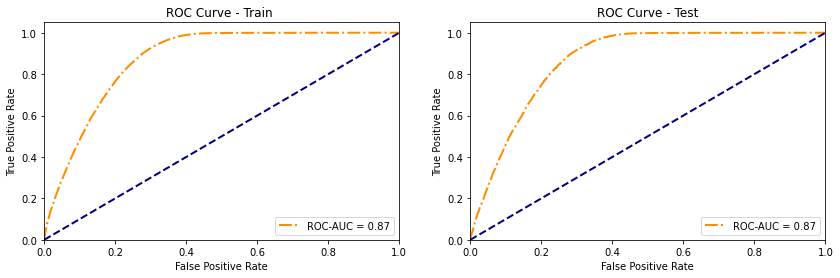

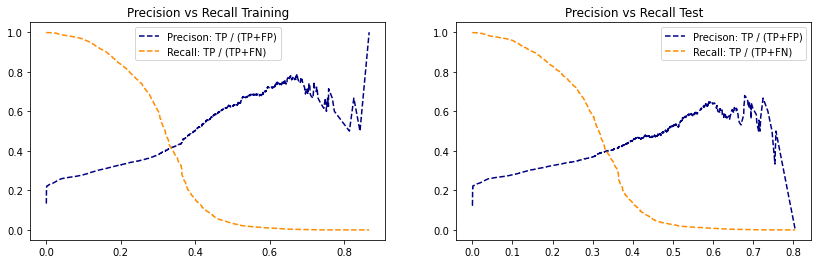

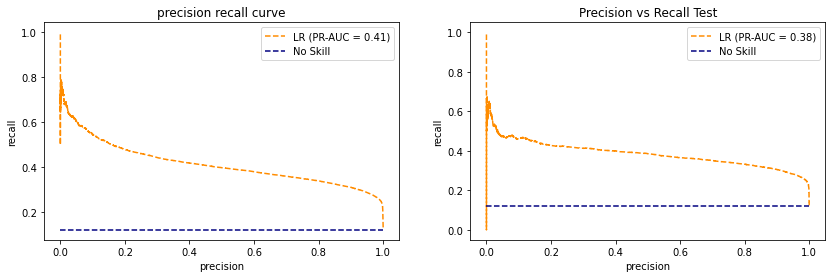

In [84]:
y = train_df2["Sonuc"]
X = train_df2.drop(columns=["Sonuc"])
X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

c = ['Cinsiyet', 'Ehliyet', 'Gecmis_police', 'Hasar_durumu','Sehir','Acenta_no']

categoricTransformer = pip.Pipeline(steps=[("encoder",pre.OneHotEncoder(handle_unknown='ignore'))
                                         ])

preprocessor = cmp.ColumnTransformer([("nm",categoricTransformer,c)], remainder='passthrough')

pipeline = pip.Pipeline(steps=[ ('prep',preprocessor),
                                ('clf', XGBClassifier(eval_metric='logloss',verbosity = 0, verbose=0, n_jobs=-1,random_state=42))
                              ])
params = { 
              'clf__learning_rate'    : [0.3],
              'clf__n_estimators'     : [80],
              'clf__max_depth'        : [6,8],
              'clf__min_child_weight' : [3], # [30,50,150]
              'clf__gamma'            : [5], # [1,5,10,50]
              #'clf__subsample'       : [ 0.9, 1],
              #'clf__colsample_bytree': [ 0.9, 1],
              #'clf__reg_alpha'        : [ 1,2],
              #'clf__reg_lambda'       : [ 1,2]
              #'clf__class_pos_weigh' : [1, 10, 25, 50, 75, 99, 100, 1000,    
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[0]),
              #                      round(((y_train.value_counts().values / y_train.shape[0] ) * 100)[1])]
              #'clf__early_stopping_rounds' : [10]
            }

kfold = mod.StratifiedKFold(n_splits=2)
grid  = mod.GridSearchCV(estimator=pipeline, param_grid=params, cv=kfold, scoring='roc_auc',verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
print(); print("Best CV score: %f using %s\n" % (grid.best_score_, grid.best_params_))
print("Training")
print(met.classification_report(y_train, grid.predict(X_train)))
print("Test")
print(met.classification_report(y_test, grid.predict(X_test)))
ROC_plotter(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve(y_train,y_test,X_train,X_test,grid.best_estimator_)
PrecisionRecallCurve2(y_train,y_test,X_train,X_test,grid.best_estimator_)

In [1]:
# performed better on test data. However it performed worse than others on public board.

In [86]:
X_train.head(2).columns

Index(['Cinsiyet', 'Yas', 'Ehliyet', 'Sehir', 'Gecmis_police', 'Arac_yasi',
       'Hasar_durumu', 'Yillik_prim', 'Acenta_no', 'Sure'],
      dtype='object')

In [87]:
df_test = pd.read_excel("Arac_test.xlsx")
df_test.head()
df_test["Yıl"] = 2021
df_test["Yas_new"] = df_test["Yıl"] - df_test["Yas"]
df.head()
def bolge(sehir):
    b1 = ["Adana","Antalya","Hatay","Isparta","Mersin","Osmaniye","Maras"]
    b2 = ["Erzurum","Malatya","Van","Agri","Elazig","Mus"]
    b3 = ["Denizli","Kutahya","Manisa","Mugla","Afyon","Aydin","Izmir","Usak"]
    b4 = ["Batman","Gaziantep","Mardin","Adiyaman","Diyarbakir","Sirnak","Urfa"]
    b5 = ["Aksaray","Ankara","Kayseri","Konya","Nigde","Sivas","Yozgat","Eskisehir"]
    b6 = ["Corum","Duzce","Giresun","Kastamonu","Ordu","Samsun","Tokat","Trabzon","Zonguldak"]
    b7 = ["Bursa","Canakkale","Edirne","Kocaeli","Sakarya","Tekirdag","Balikesir","Istanbul"]
    if sehir in b1:
        return "1"
    elif sehir in b2:
        return "2"
    elif sehir in b3:
        return "3"
    elif sehir in b4:
        return "4"
    elif sehir in b5:
        return "5"
    elif sehir in b6:
        return "6"
    elif sehir in b7:
        return "7"
    else:
        return "7"
df_test["bolge"] = df_test["Sehir"].apply(lambda x : bolge(x))

def ynew(y):
    if y >1992:
        return 1
    elif y <=1992 and y > 1958:
        return 2
    else:
        return 3
df_test["Yas_c"] = df_test["Yas"].apply(lambda x : ynew(x))

def acenta(ac_list,ac):
    if ac in ac_list:
        return ac
    else:
        return 999
df_test["Acenta_new"] = df_test["Acenta_no"].apply(lambda x : acenta(ac_list,x))
df_test["Acenta_new"].value_counts()
df_test["Arac_yasi"] = df_test["Arac_yasi"].map({'1-2 Yil':1, '< 1 Yil':0, '2-5 Yil':3, '5-10 Yil':4, '> 10 Yil':5})
test_df= df_test[['Cinsiyet', 'Yas', 'Ehliyet', 'Sehir', 'Gecmis_police', 'Arac_yasi','Hasar_durumu', 'Yillik_prim', 'Acenta_no', 'Sure']]
test_df.head()
pred_prob6 = pd.DataFrame(grid.best_estimator_.predict_proba(test_df)[:,1],columns=["Prediction"])
pred = pred_prob6.reset_index().rename(columns={'index': 'ID'})
pred["ID"] = pred["ID"] + 1 # index 0dan baslayınca hata verdi. 
pred.to_csv('pred.csv', index=False)